# Assignment 1: Data Parsing, Cleansing and Integration
## Task 1 and 2
#### Student Name: Wing Hang Chan
#### Student ID: s3939713

Date: 2022-08-20

Version: 1.0

Environment: Python 3 and Jupyter notebook

Libraries used: please include the main libraries you used in your assignment, e.g.,:
* pandas
* re
* numpy

## Introduction
Brief information of this assessment, e.g., what problems were this assessment tackling, what problems were discovered in the data while you were parsing or cleansing it, and the approaches you chose to handle them, etc.

<span style="color: red"> Note that this is a sample notebook only. You will need to fill in the proper markdown and code blocks. You might also want to make necessary changes to the structure to meet your own needs. Note also that any generic comments written in this notebook are to be removed and replace with your own words.</span>

## Importing libraries 

In [1]:
# Code to import libraries as you need in this assessment, e.g.,
import xml.etree.ElementTree as etree
import pandas as pd 
from dateutil import parser
import datetime
import difflib
import numpy as np
import warnings

warnings.filterwarnings("ignore")

## Task 1. Parsing Data

### 1.1. Examining and loading data
Examine "\<student\_id\>_dataset1.xml" to determine its content and structure, then load it into Python. Explain your findings here, e.g., how are the records are stored? 

Using element tree to get all `SrcName` and then use pandas `read_xml` to read all `<Ad>` by `SrcName` with xpath.

In [2]:
# Code to inspect the provided data file
# Couple of notes for all code block in this notebook
## please provide proper comment on your code
## Please re-start and run all cells to make sure codes are runable and include your output in the submission

tree = etree.parse("./s3939713_dataset1.xml")

root = tree.getroot()     

srcNames = []
for r in root: 
    srcNames.append(r.attrib['SrcName'])


In [3]:
df_srcNames_list = []
for srcName in srcNames:
    df = pd.read_xml("./s3939713_dataset1.xml", "/Advertisements/Source[@SrcName='{}']/Ad".format(srcName))
    df['SourceName'] = srcName
    df_srcNames_list.append(df)
    

In [4]:
df_all_source = pd.concat(df_srcNames_list)

df_2 = pd.read_xml("./s3939713_dataset1.xml", "/Advertisements/Source/Ad")

df_2_id = df_2['Id']
df_2_id


0        69088071
1        69088171
2        64120279
3        68013770
4        71830336
           ...   
50748    69689514
50749    59865461
50750    67931957
50751    65120529
50752    66372417
Name: Id, Length: 50753, dtype: int64

It shows that there are total of 50753 `<Ad>` tags in the files. And, it matches with find `</Ad>` in a word processor. And, the next cell will merge the `df_2_id` with `df_all_source` by column `Id` in order to have an index of original dataset (i.e. `indexOfdf`). It also proves the dataframe has all unique `Id` as `nunique` is 50753.

In [5]:
df_raw = pd.merge(df_2['Id'], df_all_source, how="inner", on=["Id"])

df = df_raw.copy(True)

df.shape

(50753, 10)

In [6]:
print(df['Id'].dtype)
print("{:<12} {:<20} {}".format('Id', "nunique:", df['Id'].nunique()))

int64
Id           nunique:             50753


Get `OpenDate` and `CloseDate` from xml. There are 50753 of date records which matches with the whole dataset.

In [7]:
df_date = pd.read_xml("./s3939713_dataset1.xml", "/Advertisements/Source/Ad/Date")
len(df_date)

50753

In [8]:
df['OpenDate'] = df_date['Open']
df['CloseDate'] = df_date['Close']
df

,Id,Title,Location,Company,Category,Salary,Date,SourceName,ContractType,ContractTime,OpenDate,CloseDate
0,69088071,Junior Operations Analyst,London,One Ten Associates,Accounting & Finance Jobs,40000.0,NaN,eFinancialCareers,NaN,NaN,20130722T000000,20130821T000000
1,69088171,Fund Manager Research Senior Analyst,London,Not disclosed,Accounting & Finance Jobs,77500.0,NaN,eFinancialCareers,NaN,NaN,20121209T000000,20121223T000000
2,64120279,Senior Consultant,London,Mirage Recruitment,Accounting & Finance Jobs,45000.0,NaN,eFinancialCareers,NaN,NaN,20131006T120000,20131020T120000
3,68013770,"Manager, Fund Accountant",London,Walker Hamill,Accounting & Finance Jobs,70000.0,NaN,eFinancialCareers,NaN,NaN,20120729T000000,20120812T000000
4,71830336,PMO Liquidity Reporting Project Manager Bank,London,Huxley Associates,Accounting & Finance Jobs,75000.0,NaN,eFinancialCareers,NaN,NaN,20130203T120000,20130217T120000
...,...,...,...,...,...,...,...,...,...,...,...,...
50748,69689514,medical help desk,Northamptonshire,Support Services Group,Healthcare & Nursing Jobs,24000/Year,NaN,jobsinsocialwork.co.uk,full_time,permanent,20130102T150000,20130201T150000
50749,59865461,Adult Care Learning Advisor,Devon,Forces Recruitment Services Ltd,Teaching Jobs,19387,NaN,jobsinsocialwork.co.uk,full_time,permanent,20130314T120000,20130513T120000
50750,67931957,Care Supervisor,West Yorkshire,Simplified Ltd,Healthcare & Nursing Jobs,14500,NaN,jobsinsocialwork.co.uk,full_time,permanent,20130306T120000,20130505T120000
50751,65120529,"Key Client Consultant (Account Manager, Area S...",Surrey,Blue Octopus Recruitment Ltd,Healthcare & Nursing Jobs,15000,NaN,jobsinsocialwork.co.uk,full_time,permanent,20120408T000000,20120508T000000


In [9]:
df.drop('Date', 1, inplace = True)

df

,Id,Title,Location,Company,Category,Salary,SourceName,ContractType,ContractTime,OpenDate,CloseDate
0,69088071,Junior Operations Analyst,London,One Ten Associates,Accounting & Finance Jobs,40000.0,eFinancialCareers,NaN,NaN,20130722T000000,20130821T000000
1,69088171,Fund Manager Research Senior Analyst,London,Not disclosed,Accounting & Finance Jobs,77500.0,eFinancialCareers,NaN,NaN,20121209T000000,20121223T000000
2,64120279,Senior Consultant,London,Mirage Recruitment,Accounting & Finance Jobs,45000.0,eFinancialCareers,NaN,NaN,20131006T120000,20131020T120000
3,68013770,"Manager, Fund Accountant",London,Walker Hamill,Accounting & Finance Jobs,70000.0,eFinancialCareers,NaN,NaN,20120729T000000,20120812T000000
4,71830336,PMO Liquidity Reporting Project Manager Bank,London,Huxley Associates,Accounting & Finance Jobs,75000.0,eFinancialCareers,NaN,NaN,20130203T120000,20130217T120000
...,...,...,...,...,...,...,...,...,...,...,...
50748,69689514,medical help desk,Northamptonshire,Support Services Group,Healthcare & Nursing Jobs,24000/Year,jobsinsocialwork.co.uk,full_time,permanent,20130102T150000,20130201T150000
50749,59865461,Adult Care Learning Advisor,Devon,Forces Recruitment Services Ltd,Teaching Jobs,19387,jobsinsocialwork.co.uk,full_time,permanent,20130314T120000,20130513T120000
50750,67931957,Care Supervisor,West Yorkshire,Simplified Ltd,Healthcare & Nursing Jobs,14500,jobsinsocialwork.co.uk,full_time,permanent,20130306T120000,20130505T120000
50751,65120529,"Key Client Consultant (Account Manager, Area S...",Surrey,Blue Octopus Recruitment Ltd,Healthcare & Nursing Jobs,15000,jobsinsocialwork.co.uk,full_time,permanent,20120408T000000,20120508T000000


### 1.2 Parsing data into the required format

<span style="color: red"> You might have complex notebook structure in this section, please feel free to create your own notebook structure. </span>

In [10]:
all_error_df = pd.DataFrame({})

# Function for adding error to error dataframe with single error
def add_to_error_list(indexOfdf, Ids, col_name, ori_value, mod_value, error_type, fixing):
    df = pd.concat([indexIfdf, Ids, col_name, ori_value, mod_value], axis=1)
    df['ColumnName'] = col_name
    df['ErrorType'] = error_type
    df['Fixing'] = fixing
    error_df.concat(df)

# Function for adding error to error dataframe with selected data frame
def add_to_error_list_by_df(err_df, ori_df, mod_df, col_name, error_type, fixing, all_error_df, skip_modify = False):
    arr = [
        pd.Series(err_df.index, index = err_df.index.tolist()).rename('indexOfdf'),
        err_df['Id'].astype(str), 
        ori_df.loc[err_df.index][col_name].astype(str).rename('Original')
    ]
    if not skip_modify:
        arr.append(mod_df.loc[err_df.index][col_name].astype(str).rename('Modified'))
    error_df = pd.concat(arr, axis=1)
    error_df['ColumnName'] = col_name
    error_df['ErrorType'] = error_type
    error_df['Fixing'] = fixing
    all_error_df = all_error_df.append(error_df, ignore_index = True)
    return all_error_df
    

#### OpenDate & Close Date

Notice that there is a record which not match with date format in column `OpenDate`. Since there is only a record, replace it manually

In [11]:
# 20133008T000000 case
err_idx = df[df['OpenDate'].str.match('20\d\d[01]\d[0-3]\dT\d{6}') == False].index
df['OpenDate'].replace(['20133008T000000'], '20130830T000000', inplace = True)

err_obj = {
    'indexOfdf': [err_idx[0]],
    'Id': [df.loc[err_idx[0]]['Id']],
    'ColumnName': ['OpenDate'],
    'Original': ['20133008T000000'],
    'Modified': ['20130830T000000'],
    'ErrorType': ['Typo'],
    'Fixing': ['replace yyyyDDMMThhmmss to yyyyMMDDThhmmss']
}

err_df = pd.DataFrame(err_obj)
err_df

,indexOfdf,Id,ColumnName,Original,Modified,ErrorType,Fixing
0,50497,69569026,OpenDate,20133008T000000,20130830T000000,Typo,replace yyyyDDMMThhmmss to yyyyMMDDThhmmss


In [12]:
all_error_df = all_error_df.append(err_df, ignore_index = True)
all_error_df.tail()

,indexOfdf,Id,ColumnName,Original,Modified,ErrorType,Fixing
0,50497,69569026,OpenDate,20133008T000000,20130830T000000,Typo,replace yyyyDDMMThhmmss to yyyyMMDDThhmmss


Parsing both date columns with `dateutil.parser`

In [13]:
# Parsing Open & Close date
df['OpenDate'] = df['OpenDate'].apply(lambda x: parser.parse(x))
df['CloseDate'] = df['CloseDate'].apply(lambda x: parser.parse(x))

In [14]:
err_obj = [{
    'indexOfdf': 'ALL',
    'Id': 'ALL',
    'ColumnName': 'OpenDate',
    'Original': 'ALL',
    'Modified': 'ALL',
    'ErrorType': 'Pharsing',
    'Fixing': 'replace string to datetime'
    },
    {
    'indexOfdf': 'ALL',
    'Id': 'ALL',
    'ColumnName': 'CloseDate',
    'Original': 'ALL',
    'Modified': 'ALL',
    'ErrorType': 'Pharsing',
    'Fixing': 'replace string to datetime'
    }
]

err_df = pd.DataFrame(err_obj)
err_df

,indexOfdf,Id,ColumnName,Original,Modified,ErrorType,Fixing
0,ALL,ALL,OpenDate,ALL,ALL,Pharsing,replace string to datetime
1,ALL,ALL,CloseDate,ALL,ALL,Pharsing,replace string to datetime


In [15]:
all_error_df = all_error_df.append(err_df, ignore_index = True)
all_error_df

,indexOfdf,Id,ColumnName,Original,Modified,ErrorType,Fixing
0,50497,69569026,OpenDate,20133008T000000,20130830T000000,Typo,replace yyyyDDMMThhmmss to yyyyMMDDThhmmss
1,ALL,ALL,OpenDate,ALL,ALL,Pharsing,replace string to datetime
2,ALL,ALL,CloseDate,ALL,ALL,Pharsing,replace string to datetime


In [16]:
# Make a deep copy after parsing date, mainly for implementation and testing
df_original = df.copy(True)

## Task 2. Auditing and cleansing the loaded data

Here, you should write your own code to audit data, identify data problems and to fix them. You are also required to record the errors found and fixings in an error list.

<span style="color: red"> You might have complex notebook structure in this section, please feel free to create your own notebook structure. </span>

By `value_counts` it shows some columns having value with not consistence with the specification (such as `ContractType` with value of '-').

In [17]:
# Auditing with all columns data value count
for col in df.columns:
    print("Column: {}".format(col))
    print(df[col].value_counts())
    print("#"*80)

Column: Id
69088071    1
66195313    1
65682029    1
65899968    1
65681946    1
           ..
72234964    1
68686644    1
72245461    1
68688469    1
66372417    1
Name: Id, Length: 50753, dtype: int64
################################################################################
Column: Title
Qualified Accounts Senior / PA to Partner                           2
Contract Risk Manager                                               2
Quality Assurance Engineer ****k  ****k                             2
Research Nurse jobs in Cambridge                                    2
Test Manager (Non functional requirements; Test, Testing, Agile)    1
                                                                   ..
Maintenance Engineer 2254M4EN                                       1
Marketing Executive within Food Services Organisation               1
Telemarketer  B2B                                                   1
Financial Controller (Interim)  ****2 Months  London (Zone 1)       1
Gr

Below show which columns have None value

In [18]:
# check all columns if any values is null
for col in df.columns:
    print("{:<12} isnull: {}".format(col, df[col].isnull().values.any()))

Id           isnull: False
Title        isnull: False
Location     isnull: False
Company      isnull: True
Category     isnull: False
Salary       isnull: True
SourceName   isnull: False
ContractType isnull: True
ContractTime isnull: True
OpenDate     isnull: False
CloseDate    isnull: False


Below simply show if there are some value which has misspelling with case of letter or spaces.

In [19]:
# check all columns if any values is nunique, lower, trim lower, isdecimal
for col in df.columns:
    print("{:<12} {:<20} {}".format(col, "nunique:", df[col].nunique()))
    if df[col].dtype == "object":
        print("{:<12} {:<20} {}".format(col, "nunique lower:", df[col].str.lower().nunique()))
        print("{:<12} {:<20} {}".format(col, "nunique trim lower:", df[col].str.lower().str.strip().nunique()))
        print("{:<12} {:<20} {}".format(col, "nunique isdecimal:", df[col].str.isdecimal().values.any()))
print(df.shape)

Id           nunique:             50753
Title        nunique:             50749
Title        nunique lower:       50749
Title        nunique trim lower:  50749
Title        nunique isdecimal:   False
Location     nunique:             496
Location     nunique lower:       488
Location     nunique trim lower:  488
Location     nunique isdecimal:   False
Company      nunique:             8730
Company      nunique lower:       8487
Company      nunique trim lower:  8487
Company      nunique isdecimal:   nan
Category     nunique:             8
Category     nunique lower:       8
Category     nunique trim lower:  8
Category     nunique isdecimal:   False
Salary       nunique:             3588
Salary       nunique lower:       3205
Salary       nunique trim lower:  3205
Salary       nunique isdecimal:   nan
SourceName   nunique:             107
SourceName   nunique lower:       107
SourceName   nunique trim lower:  107
SourceName   nunique isdecimal:   False
ContractType nunique:             

### Start to cleanse data below by columns with desending order

#### SourceName
Compare `SourceName` with `difflib` by using cutoff of 0.9.
As both londonjobs.co.uk and london4jobs.co.uk are make sense, no action taken for the source name.

In [20]:
# Auditing for SourceName
unique_src_list = df['SourceName'].unique()
for source in unique_src_list:
    diff = difflib.get_close_matches(source, set(df['SourceName']).difference([source]), n = 1, cutoff=0.9)
    print("Source: {:<30} diff: {}".format(source, diff))

Source: eFinancialCareers              diff: []
Source: jobs.catererandhotelkeeper.com diff: []
Source: jobsite.co.uk                  diff: []
Source: careworx.co.uk                 diff: []
Source: MyUkJobs                       diff: []
Source: gojobsearch.co.uk              diff: []
Source: staffnurse.com                 diff: []
Source: salestarget.co.uk              diff: []
Source: totaljobs.com                  diff: []
Source: cv-library.co.uk               diff: []
Source: emptylemon.co.uk               diff: []
Source: cvbrowser.com                  diff: []
Source: jobs.guardian.co.uk            diff: []
Source: mediaweekjobs.co.uk            diff: []
Source: planetrecruit.com              diff: []
Source: Jobcentre Plus                 diff: []
Source: justengineers.net              diff: []
Source: technojobs.co.uk               diff: []
Source: rengineeringjobs.com           diff: []
Source: theitjobboard.co.uk            diff: []
Source: jobsinrisk.com                 d

#### Open & Close Date
As all dates has been parse by date parser, the format is clean. 
Needs to check with logic consistence of `OpenDate` and `CloseDate`.
Also to check with if there is any outliers of dates with using describe() by analyzing the date range

In [21]:
# check open and close date inconsistence
err_open_close_date_df = df[df['OpenDate'] > df['CloseDate']]

err_open_close_date_df

,Id,Title,Location,Company,Category,Salary,SourceName,ContractType,ContractTime,OpenDate,CloseDate
24625,69936279,Marketing/IT Support,Carlisle,Adecco,"PR, Advertising & Marketing Jobs",21500,cv-library.co.uk,-,contract,2012-05-24 00:00:00,2012-03-25 00:00:00
37332,68627389,Linux System Administrator RHCE Redhat,Central London,Harris Global,IT Jobs,50000,jobserve.com,NaN,permanent,2013-03-24 00:00:00,2012-12-24 00:00:00
43842,69504849,SEN Teachers Required in Harrow,Harrow,Capita Education,Teaching Jobs,31200,jobs.newstatesman.com,full_time,contract,2012-08-03 12:00:00,2012-06-04 12:00:00
46848,67770554,Business Analyst / Project Manager Prince****...,Basildon,NaN,IT Jobs,30000,britishjobsonthe.net,NaN,NaN,2012-03-23 12:00:00,2012-01-23 12:00:00
49986,72393629,RawGraduate Structural Engineer,London,Walker Dendle,Engineering Jobs,23500,ncejobs.co.uk,NaN,permanent,2013-01-08 00:00:00,2012-11-09 00:00:00


In [22]:
# Open vs Close date
df.loc[err_open_close_date_df.index,'OpenDate'] = df_original.loc[err_open_close_date_df.index]['CloseDate']
df.loc[err_open_close_date_df.index,'CloseDate'] = df_original.loc[err_open_close_date_df.index]['OpenDate']


In [23]:
all_error_df = add_to_error_list_by_df(err_open_close_date_df, df_original, df, 'OpenDate', 'Violations of the Integrity constraint', 'swap open and close date', all_error_df)
all_error_df = add_to_error_list_by_df(err_open_close_date_df, df_original, df, 'CloseDate', 'Violations of the Integrity constraint', 'swap open and close date', all_error_df)

all_error_df.tail()

,indexOfdf,Id,ColumnName,Original,Modified,ErrorType,Fixing
8,24625,69936279,CloseDate,2012-03-25 00:00:00,2012-05-24 00:00:00,Violations of the Integrity constraint,swap open and close date
9,37332,68627389,CloseDate,2012-12-24 00:00:00,2013-03-24 00:00:00,Violations of the Integrity constraint,swap open and close date
10,43842,69504849,CloseDate,2012-06-04 12:00:00,2012-08-03 12:00:00,Violations of the Integrity constraint,swap open and close date
11,46848,67770554,CloseDate,2012-01-23 12:00:00,2012-03-23 12:00:00,Violations of the Integrity constraint,swap open and close date
12,49986,72393629,CloseDate,2012-11-09 00:00:00,2013-01-08 00:00:00,Violations of the Integrity constraint,swap open and close date


In [24]:
# Check the date range of Open & Close Date
df['OpenDate'].describe()

count                   50753
unique                   2193
top       2013-06-26 15:00:00
freq                       42
first     2012-01-01 00:00:00
last      2013-12-31 15:00:00
Name: OpenDate, dtype: object

In [25]:
df['CloseDate'].describe()

count                   50753
unique                   2416
top       2013-06-26 00:00:00
freq                       40
first     2012-01-15 12:00:00
last      2014-03-31 15:00:00
Name: CloseDate, dtype: object

Both Open and Close Date are within 2012 to 2014, they are make sense right now.

#### Salary
There are lots of cleansing with salary.
1. not a float (with /Year, per year, etc.)
2. None value
3. meaningless value (e.g. '-' or 0 or 'None')
4. non-digit value with meaning (e.g. 28K, 45K, etc.)
5. a range of value ( xxx To yyy, xxx - yyy, xxx ~ yyy, etc.)
6. outliers 

In [26]:
# Auditing salary with non digit value
err_salary_df = df[~df['Salary'].astype(str).str.replace('.','',1).str.isdigit()]
err_salary_df.head()


,Id,Title,Location,Company,Category,Salary,SourceName,ContractType,ContractTime,OpenDate,CloseDate
10,71373417,Senior Audit Manager Wealth,London,Badenoch & Clark,Accounting & Finance Jobs,NaN,eFinancialCareers,NaN,NaN,2012-10-05 12:00:00,2012-11-04 12:00:00
15,72417429,AVP Legal Entity Control,London,Hays Financial Markets,Accounting & Finance Jobs,NaN,eFinancialCareers,NaN,NaN,2012-04-19 15:00:00,2012-06-18 15:00:00
16,68393489,Assistant Assurance Manager 12 Months Fixed T...,London,PSD Risk,Accounting & Finance Jobs,NaN,eFinancialCareers,NaN,NaN,2013-07-23 12:00:00,2013-08-22 12:00:00
30,67023463,Compliance Monitoring IFA/Professional Services,London,Taylor Root London,Accounting & Finance Jobs,NaN,eFinancialCareers,NaN,NaN,2013-03-10 12:00:00,2013-05-09 12:00:00
77,71830109,Senior Financial Controller Hedge Fund,East Midlands,Black Swan Group,Accounting & Finance Jobs,NaN,eFinancialCareers,NaN,NaN,2013-07-31 15:00:00,2013-08-30 15:00:00


In [27]:
# Auditing salary with non digit value after removing na

err_salary_df = df[~df['Salary'].astype(str).str.replace('.','',1).str.isdigit()]
err_salary_df['Salary'].unique()

array([nan, '22000/Year', '23500 To 24500', '25000per year',
       '17000 -  18000', '20500 To 21500', '26000 ~  27000',
       '26500 To 27500', '24500 To 25500', '23500per year', '-', '45K',
       '45000per year', '49500 To 50500', '33000 To 34000',
       '32000 ~  33000', '46500 To 47500', '31000 -  32000',
       '32500 To 33500', '30000/Year', '40000/Year', '50000/Year', '28K',
       '42500 To 43500', '32K', '29500 To 30500', '34000per year',
       '34500 To 35500', '32500/Year', '53500 To 54500', '15.17 p/h',
       '29000 To 30000', '17.47 per Hour', '23181 To 24181', '24500/Year',
       '24800 To 25800', '30000per year', '26500 ~  27500', '24000/Year',
       '20K', '28800/Year', '29500 -  30500', '28500  ~  29500',
       '39500  ~  40500', '39500 -  40500', '50000per year', '44160/Year',
       '25K', '11.49 p/h', '27000 To 28000', '28320per year', '13.89 p/h',
       '37500per year', '30500per year', '35308/Year', '11.95 per Hour',
       '34560per year', '17.01 per Ho

In [28]:
# removing "/Year" for salary
err_salary_df_year = df[df['Salary'].astype(str).str.endswith("/Year")]

df['Salary'] = df['Salary'].astype(str).str.replace(r'/Year', '')

all_error_df = add_to_error_list_by_df(err_salary_df_year, df_original, df, 'Salary', 'Violations of the Integrity constraint', 'replace "/Year" with ""', all_error_df)

all_error_df.tail()


,indexOfdf,Id,ColumnName,Original,Modified,ErrorType,Fixing
108,48506,67393592,Salary,35000/Year,35000,Violations of the Integrity constraint,"replace ""/Year"" with """""
109,49321,68498061,Salary,24000/Year,24000,Violations of the Integrity constraint,"replace ""/Year"" with """""
110,50194,68718200,Salary,35308/Year,35308,Violations of the Integrity constraint,"replace ""/Year"" with """""
111,50405,69035512,Salary,41500/Year,41500,Violations of the Integrity constraint,"replace ""/Year"" with """""
112,50748,69689514,Salary,24000/Year,24000,Violations of the Integrity constraint,"replace ""/Year"" with """""


In [29]:
# removing "per year" for salary
err_salary_df_year_2 = df[df['Salary'].astype(str).str.endswith("per year")]

df['Salary'] = df['Salary'].astype(str).str.replace(r'per year', '')

all_error_df = add_to_error_list_by_df(err_salary_df_year_2, df_original, df, 'Salary', 'Violations of the Integrity constraint', 'replace "per year" with ""', all_error_df)

all_error_df.tail()


,indexOfdf,Id,ColumnName,Original,Modified,ErrorType,Fixing
208,49530,68849291,Salary,21750per year,21750,Violations of the Integrity constraint,"replace ""per year"" with """""
209,50163,68718314,Salary,34502per year,34502,Violations of the Integrity constraint,"replace ""per year"" with """""
210,50415,67905141,Salary,24000per year,24000,Violations of the Integrity constraint,"replace ""per year"" with """""
211,50447,72342075,Salary,35308per year,35308,Violations of the Integrity constraint,"replace ""per year"" with """""
212,50510,69569028,Salary,32280per year,32280,Violations of the Integrity constraint,"replace ""per year"" with """""


In [30]:
# replacing "K" with "000" for salary
err_salary_df_K = df[df['Salary'].astype(str).str.endswith("K")]

df['Salary'] = df['Salary'].astype(str).str.replace(r'K', '000')

all_error_df = add_to_error_list_by_df(err_salary_df_K, df_original, df, 'Salary', 'Violations of the Integrity constraint', 'replace "K" with "000"', all_error_df)

all_error_df.tail()


,indexOfdf,Id,ColumnName,Original,Modified,ErrorType,Fixing
258,47451,72384848,Salary,28K,28000,Violations of the Integrity constraint,"replace ""K"" with ""000"""
259,48642,69163432,Salary,50K,50000,Violations of the Integrity constraint,"replace ""K"" with ""000"""
260,49037,69779227,Salary,30K,30000,Violations of the Integrity constraint,"replace ""K"" with ""000"""
261,49604,68849283,Salary,22K,22000,Violations of the Integrity constraint,"replace ""K"" with ""000"""
262,50552,71392888,Salary,40K,40000,Violations of the Integrity constraint,"replace ""K"" with ""000"""


In [31]:
# replacing salary with "between" signs (e.g. to, -, ~) and calculate with average
pat = r'(\d+)\s+([\-\~]|To)\s+(\d+)'
repl = lambda m: str((float(m.group(1)) + float(m.group(3))) / 2)

err_salary_df_to = df[df['Salary'].astype(str).str.match(pat)]

df['Salary'] = df['Salary'].astype(str).str.replace(pat, repl, regex = True)

all_error_df = add_to_error_list_by_df(err_salary_df_to, df_original, df, 'Salary', 'Violations of the Integrity constraint', 'replace "To | - | ~" with 123', all_error_df)

all_error_df.tail()

,indexOfdf,Id,ColumnName,Original,Modified,ErrorType,Fixing
448,49499,71073530,Salary,27500 - 28500,28000.0,Violations of the Integrity constraint,"replace ""To | - | ~"" with 123"
449,49501,71588730,Salary,31500 To 32500,32000.0,Violations of the Integrity constraint,"replace ""To | - | ~"" with 123"
450,49766,72428178,Salary,34500 To 35500,35000.0,Violations of the Integrity constraint,"replace ""To | - | ~"" with 123"
451,50122,72385733,Salary,39500 ~ 40500,40000.0,Violations of the Integrity constraint,"replace ""To | - | ~"" with 123"
452,50483,72625399,Salary,19500 To 20500,20000.0,Violations of the Integrity constraint,"replace ""To | - | ~"" with 123"


In [32]:
# calculate hourly rate to yearly rate
pat2 = r'(\d+\.\d+)\s+(p/h|per Hour)'
repl2 = lambda m: str(float(m.group(1)) * 37.5 * 52)

err_salary_df_hour = df[df['Salary'].astype(str).str.match(pat2)]

df['Salary'] = df['Salary'].astype(str).str.replace(pat2, repl2, regex = True)

all_error_df = add_to_error_list_by_df(err_salary_df_hour, df_original, df, 'Salary', 'Violations of the Integrity constraint', 'replace hour rate and multiplied by 37.5 * 52', all_error_df)

all_error_df.tail()

,indexOfdf,Id,ColumnName,Original,Modified,ErrorType,Fixing
468,31692,69959221,Salary,20.4 per Hour,39780.0,Violations of the Integrity constraint,replace hour rate and multiplied by 37.5 * 52
469,42564,68800705,Salary,20.35 per Hour,39682.5,Violations of the Integrity constraint,replace hour rate and multiplied by 37.5 * 52
470,43629,69909016,Salary,14.37 p/h,28021.5,Violations of the Integrity constraint,replace hour rate and multiplied by 37.5 * 52
471,45181,62119445,Salary,13.79 p/h,26890.5,Violations of the Integrity constraint,replace hour rate and multiplied by 37.5 * 52
472,49581,68849340,Salary,9.85 per Hour,19207.5,Violations of the Integrity constraint,replace hour rate and multiplied by 37.5 * 52


Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            50743, 50744, 50745, 50746, 50747, 50748, 50749, 50750, 50751,
            50752],
           dtype='int64', length=49096)


<AxesSubplot:title={'center':'Salary'}, xlabel='Category'>

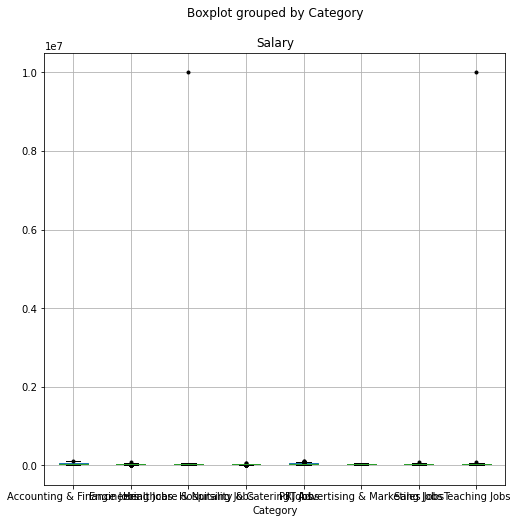

In [33]:
# creating a dataframe for calculating salary mean by category

salary_replace_mask = ((df['Salary'] == '-') |(df['Salary'] == 'None') | (df['Salary'].isna()) | (df['Salary'] == 'nan') )
idx_salary_float = df[~salary_replace_mask].index
print(idx_salary_float)
df_salary = df.loc[idx_salary_float]
df_salary['Salary'] = df_salary['Salary'].astype(float)

# spotting outliers
df_salary.boxplot(column='Salary', by = 'Category',sym='k.', figsize=(8, 8))

In [34]:
# exclude outliers and 0 to calculate salary mean grouped by Category
df_salary_2 = df_salary[(df_salary['Salary'] < 1000000) & (df_salary['Salary'] > 0)]
df_salary_2

,Id,Title,Location,Company,Category,Salary,SourceName,ContractType,ContractTime,OpenDate,CloseDate
0,69088071,Junior Operations Analyst,London,One Ten Associates,Accounting & Finance Jobs,40000.0,eFinancialCareers,NaN,NaN,2013-07-22 00:00:00,2013-08-21 00:00:00
1,69088171,Fund Manager Research Senior Analyst,London,Not disclosed,Accounting & Finance Jobs,77500.0,eFinancialCareers,NaN,NaN,2012-12-09 00:00:00,2012-12-23 00:00:00
2,64120279,Senior Consultant,London,Mirage Recruitment,Accounting & Finance Jobs,45000.0,eFinancialCareers,NaN,NaN,2013-10-06 12:00:00,2013-10-20 12:00:00
3,68013770,"Manager, Fund Accountant",London,Walker Hamill,Accounting & Finance Jobs,70000.0,eFinancialCareers,NaN,NaN,2012-07-29 00:00:00,2012-08-12 00:00:00
4,71830336,PMO Liquidity Reporting Project Manager Bank,London,Huxley Associates,Accounting & Finance Jobs,75000.0,eFinancialCareers,NaN,NaN,2013-02-03 12:00:00,2013-02-17 12:00:00
...,...,...,...,...,...,...,...,...,...,...,...
50748,69689514,medical help desk,Northamptonshire,Support Services Group,Healthcare & Nursing Jobs,24000.0,jobsinsocialwork.co.uk,full_time,permanent,2013-01-02 15:00:00,2013-02-01 15:00:00
50749,59865461,Adult Care Learning Advisor,Devon,Forces Recruitment Services Ltd,Teaching Jobs,19387.0,jobsinsocialwork.co.uk,full_time,permanent,2013-03-14 12:00:00,2013-05-13 12:00:00
50750,67931957,Care Supervisor,West Yorkshire,Simplified Ltd,Healthcare & Nursing Jobs,14500.0,jobsinsocialwork.co.uk,full_time,permanent,2013-03-06 12:00:00,2013-05-05 12:00:00
50751,65120529,"Key Client Consultant (Account Manager, Area S...",Surrey,Blue Octopus Recruitment Ltd,Healthcare & Nursing Jobs,15000.0,jobsinsocialwork.co.uk,full_time,permanent,2012-04-08 00:00:00,2012-05-08 00:00:00


In [35]:
# statistics of salary
df_salary_mean = df_salary_2.groupby(df_salary_2['Category']).describe()[['Salary']]
df_salary_mean


Salary                                      \
                                    count          mean           std     min   
Category                                                                        
Accounting & Finance Jobs          6404.0  40369.990475  20222.076826  5000.0   
Engineering Jobs                   7174.0  33510.070951  10780.114621  5088.0   
Healthcare & Nursing Jobs          7640.0  30059.057003  11558.569522  5000.0   
Hospitality & Catering Jobs        4165.0  22431.438175   7046.609440  5000.0   
IT Jobs                           12530.0  43603.801995  17737.097457  5000.0   
PR, Advertising & Marketing Jobs   2400.0  32309.316250  11758.309749  5000.0   
Sales Jobs                         4627.0  28262.918414  10654.499986  5088.0   
Teaching Jobs                      3314.0  26283.757846   8790.457718  5000.0   

                                                                        
                                       25%      50%      75%       max  
Category                                                                
Accounting & Finance Jobs         23500.00  36000.0  52500.0  114179.0  
Engineering Jobs                  25470.75  32500.0  40000.0   83544.0  
Healthcare & Nursing Jobs         22368.00  28000.0  37500.0   60000.0  
Hospitality & Catering Jobs       17250.00  21500.0  27000.0   63544.0  
IT Jobs                           30000.00  40000.0  55000.0  107089.0  
PR, Advertising & Marketing Jobs  24000.00  30400.0  40000.0   64000.0  
Sales Jobs                        20000.00  26500.0  35000.0   73544.0  
Teaching Jobs                     19500.00  26570.0  32400.0   72277.0

In [36]:
# dropping multi index of column
df_salary_mean = df_salary_mean.droplevel(level=0, axis=1)

In [37]:
# round salary mean to 2 decimal places as required
df_salary_mean_by_category = round(df_salary_mean[['mean']], 2)
df_salary_mean_by_category

,mean
Category,
Accounting & Finance Jobs,40369.99
Engineering Jobs,33510.07
Healthcare & Nursing Jobs,30059.06
Hospitality & Catering Jobs,22431.44
IT Jobs,43603.80
"PR, Advertising & Marketing Jobs",32309.32
Sales Jobs,28262.92
Teaching Jobs,26283.76


In [38]:
# replace those meaningless salary to its category mean
idx_err_salary_other = df[salary_replace_mask].index
err_obj_list = []
for idx in idx_err_salary_other:
    df.loc[idx, 'Salary'] = df_salary_mean_by_category.loc[df.loc[idx].Category, 'mean']
    err_obj = {
        'indexOfdf': idx,
        'Id': df.loc[idx, 'Id'],
        'ColumnName': 'Salary',
        'Original': df_original.loc[idx, 'Salary'],
        'Modified': df.loc[idx, 'Salary'],
        'ErrorType': 'Data Integreation',
        'Fixing': 'replace salary with its category mean'
    }
    err_obj_list.append(err_obj)
err_df = pd.DataFrame(err_obj_list)
all_error_df = all_error_df.append(err_df, ignore_index = True)
all_error_df.tail()

,indexOfdf,Id,ColumnName,Original,Modified,ErrorType,Fixing
2125,50633,70207295,Salary,NaN,40369.99,Data Integreation,replace salary with its category mean
2126,50692,71037815,Salary,NaN,33510.07,Data Integreation,replace salary with its category mean
2127,50699,72159208,Salary,NaN,26283.76,Data Integreation,replace salary with its category mean
2128,50714,71530684,Salary,-,43603.8,Data Integreation,replace salary with its category mean
2129,50736,72579028,Salary,NaN,40369.99,Data Integreation,replace salary with its category mean


Cast salary as float after cleansing

In [39]:
# Change Salary Type to float
df.Salary = df.Salary.astype(float)
print(df.dtypes)
err_obj = [{
    'indexOfdf': 'ALL',
    'Id': 'ALL',
    'ColumnName': 'Salary',
    'Original': 'ALL',
    'Modified': 'ALL',
    'ErrorType': 'Data Type',
    'Fixing': 'change salary type from string to float'
}]
err_df = pd.DataFrame(err_obj)
all_error_df = all_error_df.append(err_df, ignore_index = True)

all_error_df.tail()

Id                       int64
Title                   object
Location                object
Company                 object
Category                object
Salary                 float64
SourceName              object
ContractType            object
ContractTime            object
OpenDate        datetime64[ns]
CloseDate       datetime64[ns]
dtype: object


,indexOfdf,Id,ColumnName,Original,Modified,ErrorType,Fixing
2126,50692,71037815,Salary,NaN,33510.07,Data Integreation,replace salary with its category mean
2127,50699,72159208,Salary,NaN,26283.76,Data Integreation,replace salary with its category mean
2128,50714,71530684,Salary,-,43603.8,Data Integreation,replace salary with its category mean
2129,50736,72579028,Salary,NaN,40369.99,Data Integreation,replace salary with its category mean
2130,ALL,ALL,Salary,ALL,ALL,Data Type,change salary type from string to float


Detect outliers with boxplot by Category

<AxesSubplot:title={'center':'Salary'}, xlabel='Category'>

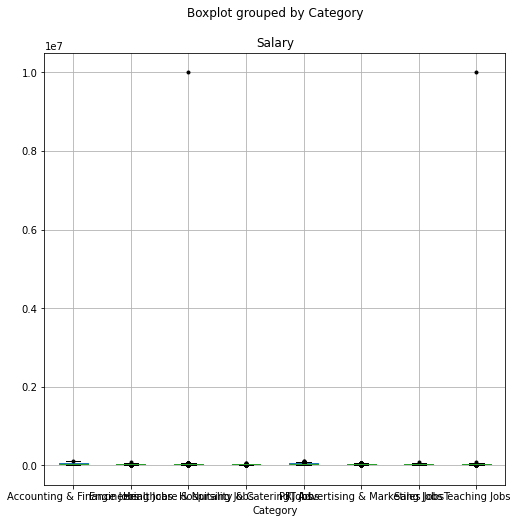

In [40]:
# use boxplot to spot outliers
df.boxplot(column='Salary', by = 'Category',sym='k.', figsize=(8, 8))

In [41]:
# replace outliers and 0 salary to its category mean
idx_salary_outlier = df[(df['Salary'] == 0) | (df['Salary'] > 500000)].index

err_obj_list = []

for idx in idx_salary_outlier:
    df.loc[idx, 'Salary'] = df_salary_mean_by_category.loc[df.loc[idx].Category, 'mean']
    err_obj = {
        'indexOfdf': idx,
        'Id': df.loc[idx, 'Id'],
        'ColumnName': 'Salary',
        'Original': df_original.loc[idx, 'Salary'],
        'Modified': df.loc[idx, 'Salary'],
        'ErrorType': 'Data Integreation',
        'Fixing': 'replace salary with its category mean'
    }
    err_obj_list.append(err_obj)
# print(err_obj_list)
err_df = pd.DataFrame(err_obj_list)
all_error_df = all_error_df.append(err_df, ignore_index = True)
all_error_df.tail()

,indexOfdf,Id,ColumnName,Original,Modified,ErrorType,Fixing
2968,50106,72385981,Salary,0,28262.92,Data Integreation,replace salary with its category mean
2969,50127,69066583,Salary,0,33510.07,Data Integreation,replace salary with its category mean
2970,50131,72385713,Salary,0,33510.07,Data Integreation,replace salary with its category mean
2971,50140,72385850,Salary,0,40369.99,Data Integreation,replace salary with its category mean
2972,50501,67307396,Salary,0,33510.07,Data Integreation,replace salary with its category mean


<AxesSubplot:title={'center':'Salary'}, xlabel='Category'>

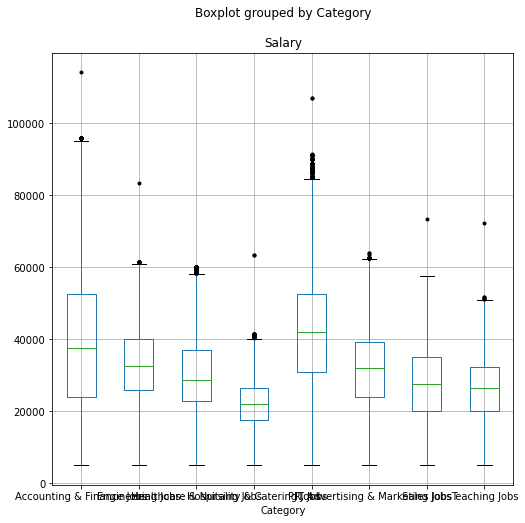

In [42]:
df.boxplot(column='Salary', by = 'Category',sym='k.', figsize=(8, 8))

#### Category
`Category` should be 
```python 
[
    'IT Jobs', 'Healthcare & Nursing Jobs', 'Engineering Jobs', 
    'Accounting & Finance Jobs', 'Sales Jobs', 'Hospitality & Catering Jobs', 
    'Teaching Jobs', 'PR, Advertising & Marketing Jobs'
]
```

In [43]:
# Auditing Category List
category_list = [
    'IT Jobs', 'Healthcare & Nursing Jobs', 'Engineering Jobs', 
    'Accounting & Finance Jobs', 'Sales Jobs', 'Hospitality & Catering Jobs', 
    'Teaching Jobs', 'PR, Advertising & Marketing Jobs'
]
err_category_df = df[~df['Category'].isin(category_list)]
err_category_df


,Id,Title,Location,Company,Category,Salary,SourceName,ContractType,ContractTime,OpenDate,CloseDate


Since there is no category error, nothing apply to this column.

#### Contract Time
`ContractTime` should be in 
```python
['permanent', 'contract', 'non-specified']
```

In [44]:
# Auditing Contract Time
df['ContractTime'].value_counts()

permanent    31010
contract      5610
-              365
Name: ContractTime, dtype: int64

In [45]:
# ContractTime
contract_time_list = ['permanent', 'contract', 'non-specified']
err_contract_time_df = df[~df['ContractTime'].isin(contract_time_list)]

df['ContractTime'] = df['ContractTime'].apply(lambda x: x if x in contract_time_list else 'non-specified')

all_error_df = add_to_error_list_by_df(err_contract_time_df, df_original, df, 'ContractTime', 'Violations of the Integrity constraint', 'replace by non-specified', all_error_df)

all_error_df.tail()


,indexOfdf,Id,ColumnName,Original,Modified,ErrorType,Fixing
17101,50719,68241125,ContractTime,-,non-specified,Violations of the Integrity constraint,replace by non-specified
17102,50720,68241115,ContractTime,-,non-specified,Violations of the Integrity constraint,replace by non-specified
17103,50721,70417262,ContractTime,-,non-specified,Violations of the Integrity constraint,replace by non-specified
17104,50722,68445079,ContractTime,-,non-specified,Violations of the Integrity constraint,replace by non-specified
17105,50723,68241131,ContractTime,-,non-specified,Violations of the Integrity constraint,replace by non-specified


In [46]:
df['ContractTime'].value_counts()

permanent        31010
non-specified    14133
contract          5610
Name: ContractTime, dtype: int64

#### Contract Type
`ContractType` should be in 
```python
['full_time', 'part_time', 'non-specified']
```

In [47]:
# Auditing Contract Time
df['ContractType'].value_counts()

full_time    11243
-            10880
part_time     1440
Name: ContractType, dtype: int64

In [48]:
contract_type_list = ['full_time', 'part_time', 'non-specified']
err_contract_type_df = df[~df['ContractType'].isin(contract_type_list)]

df['ContractType'] = df['ContractType'].apply(lambda x: x if x in contract_type_list else 'non-specified')

all_error_df = add_to_error_list_by_df(err_contract_type_df, df_original, df, 'ContractType', 'Violations of the Integrity constraint', 'replace "na" with non-specified', all_error_df)

all_error_df.tail()


,indexOfdf,Id,ColumnName,Original,Modified,ErrorType,Fixing
55171,50740,70229148,ContractType,-,non-specified,Violations of the Integrity constraint,"replace ""na"" with non-specified"
55172,50741,68290740,ContractType,-,non-specified,Violations of the Integrity constraint,"replace ""na"" with non-specified"
55173,50742,69973924,ContractType,-,non-specified,Violations of the Integrity constraint,"replace ""na"" with non-specified"
55174,50743,71600610,ContractType,-,non-specified,Violations of the Integrity constraint,"replace ""na"" with non-specified"
55175,50744,69117118,ContractType,-,non-specified,Violations of the Integrity constraint,"replace ""na"" with non-specified"


In [49]:
df['ContractType'].value_counts()

non-specified    38070
full_time        11243
part_time         1440
Name: ContractType, dtype: int64

#### Company
1. Applied `str.title()` to `Company` for better comparison
2. Change some no-meaning wording to non-specified (e.g. Not disclosed, -, Nan, UNKNOWN xxx, etc.)
3. Replacing double spaces between words with single
4. Replacing all dots at the beginning and end of the words for better comparison
5. Replacing Limited to Ltd for better comparison
6. Replacing some company names by applying `difflib` suggestion
7. Adding some company name from `difflib` suggestion in a extra dataframe `manual_handling_df` for manual handling

In [50]:
df['Company'].value_counts()

UKStaffsearch              447
Randstad                   373
-                          309
CVbrowser                  296
Penguin Recruitment        231
                          ... 
BIS RECRUIT                  1
RENAISI                      1
SPEYSIDE HIGH SCHOOL         1
BRITISH LUNG FOUNDATION      1
Proxime Ltd                  1
Name: Company, Length: 8730, dtype: int64

In [51]:
# Company with Not disclosed, "/" and na treated as non-specified
idx_err_company_non_specified = df[(df['Company'] == 'Not disclosed') | (df['Company'] == '-') | (df['Company'] == '.') | (df['Company'].isna()) | (df['Company'] == np.nan)].index

df.loc[idx_err_company_non_specified,'Company'] = 'non-specified'

all_error_df = add_to_error_list_by_df(df.loc[idx_err_company_non_specified], df_original, df, 'Company', 'Violations of the Integrity constraint', 'replace "-", "Not disclose", "na" with non-specified', all_error_df)
all_error_df.tail()


,indexOfdf,Id,ColumnName,Original,Modified,ErrorType,Fixing
60154,50740,70229148,Company,-,non-specified,Violations of the Integrity constraint,"replace ""-"", ""Not disclose"", ""na"" with non-spe..."
60155,50741,68290740,Company,-,non-specified,Violations of the Integrity constraint,"replace ""-"", ""Not disclose"", ""na"" with non-spe..."
60156,50742,69973924,Company,-,non-specified,Violations of the Integrity constraint,"replace ""-"", ""Not disclose"", ""na"" with non-spe..."
60157,50743,71600610,Company,-,non-specified,Violations of the Integrity constraint,"replace ""-"", ""Not disclose"", ""na"" with non-spe..."
60158,50744,69117118,Company,-,non-specified,Violations of the Integrity constraint,"replace ""-"", ""Not disclose"", ""na"" with non-spe..."


In [52]:
err_company_non_specified_df2 = df[df['Company'].str.contains("UNKNOWN")]

df['Company'] = df['Company'].apply(lambda x: 'non-specified' if "UNKNOWN" in x else x)

all_error_df = add_to_error_list_by_df(err_company_non_specified_df2, df_original, df, 'Company', 'Violations of the Integrity constraint', 'replace "UNKNOWN" with non-specified', all_error_df)

all_error_df.tail()


,indexOfdf,Id,ColumnName,Original,Modified,ErrorType,Fixing
60156,50742,69973924,Company,-,non-specified,Violations of the Integrity constraint,"replace ""-"", ""Not disclose"", ""na"" with non-spe..."
60157,50743,71600610,Company,-,non-specified,Violations of the Integrity constraint,"replace ""-"", ""Not disclose"", ""na"" with non-spe..."
60158,50744,69117118,Company,-,non-specified,Violations of the Integrity constraint,"replace ""-"", ""Not disclose"", ""na"" with non-spe..."
60159,50655,68704692,Company,UNKNOWN auto added by vacany import,non-specified,Violations of the Integrity constraint,"replace ""UNKNOWN"" with non-specified"
60160,50656,72420369,Company,UNKNOWN auto added by vacany import,non-specified,Violations of the Integrity constraint,"replace ""UNKNOWN"" with non-specified"


In [53]:
# replacing Company with double spaces 
pat = r'(.*)\s{2,}(.*)'
repl = lambda m: m.group(1) + " " + m.group(2)

err_company_space_df = df[df['Company'].astype(str).str.match(pat)]

while len(err_company_space_df) > 0:
    df['Company'] = df['Company'].astype(str).str.replace(pat, repl, regex = True)
    all_error_df = add_to_error_list_by_df(err_company_space_df, df_original, df, 'Company', 'Violations of the Integrity constraint', 'replace double space with single', all_error_df)
    err_company_space_df = df[df['Company'].astype(str).str.match(pat)]

all_error_df.tail()

,indexOfdf,Id,ColumnName,Original,Modified,ErrorType,Fixing
62572,50180,68718623,Company,NHS National Services Scotland National Serv...,NHS National Services Scotland National Servic...,Violations of the Integrity constraint,replace double space with single
62573,50182,68718345,Company,NHS National Services Scotland Information S...,NHS National Services Scotland Information Ser...,Violations of the Integrity constraint,replace double space with single
62574,50645,69521485,Company,Atkins Ltd Water Environment,Atkins Ltd Water Environment,Violations of the Integrity constraint,replace double space with single
62575,318,71127286,Company,Eames Consulting Change Financial Services,Eames Consulting Change Financial Services,Violations of the Integrity constraint,replace double space with single
62576,318,71127286,Company,Eames Consulting Change Financial Services,Eames Consulting Change Financial Services,Violations of the Integrity constraint,replace double space with single


In [54]:
# replacing all '.' at the front of company name for all Company name
pat = r'^\.(.*)'
repl = lambda m: m.group(1)

err_company_dot_df = df[df['Company'].str.match(pat)]
while len(err_company_dot_df) > 0:
    df['Company'] = df['Company'].str.replace(pat, repl, regex = True)
    all_error_df = add_to_error_list_by_df(err_company_dot_df, df_original, df, 'Company', 'Violations of the Integrity constraint', 'replace "." at the front', all_error_df)
    err_company_dot_df = df[df['Company'].astype(str).str.match(pat)]
    
all_error_df.tail()

,indexOfdf,Id,ColumnName,Original,Modified,ErrorType,Fixing
62574,50645,69521485,Company,Atkins Ltd Water Environment,Atkins Ltd Water Environment,Violations of the Integrity constraint,replace double space with single
62575,318,71127286,Company,Eames Consulting Change Financial Services,Eames Consulting Change Financial Services,Violations of the Integrity constraint,replace double space with single
62576,318,71127286,Company,Eames Consulting Change Financial Services,Eames Consulting Change Financial Services,Violations of the Integrity constraint,replace double space with single
62577,112,69088074,Company,.Michael Page Financial Services.,Michael Page Financial Services.,Violations of the Integrity constraint,"replace ""."" at the front"
62578,348,69969302,Company,.Michael Page Financial Services.,Michael Page Financial Services.,Violations of the Integrity constraint,"replace ""."" at the front"


In [55]:
# replacing all '.' at the end of company name for all Company name
pat = r'(.*)\.+$'
repl = lambda m: m.group(1)

err_company_dot_df2 = df[df['Company'].str.match(pat)]
err_company_dot_df2
while len(err_company_dot_df2) > 0:
    df['Company'] = df['Company'].astype(str).str.replace(pat, repl, regex = True)
    all_error_df = add_to_error_list_by_df(err_company_dot_df2, df_original, df, 'Company', 'Violations of the Integrity constraint', 'replace "." at the end', all_error_df)
    err_company_dot_df2 = df[df['Company'].str.match(pat)]
    
all_error_df.tail()


,indexOfdf,Id,ColumnName,Original,Modified,ErrorType,Fixing
63360,49910,68297999,Company,Head Hunt International Ltd.,Head Hunt International Ltd,Violations of the Integrity constraint,"replace ""."" at the end"
63361,50376,56281394,Company,Language Recruitment Services.,Language Recruitment Services,Violations of the Integrity constraint,"replace ""."" at the end"
63362,50705,70768357,Company,Orleston Associates Ltd.,Orleston Associates Ltd,Violations of the Integrity constraint,"replace ""."" at the end"
63363,50708,72118590,Company,Orleston Associates Ltd.,Orleston Associates Ltd,Violations of the Integrity constraint,"replace ""."" at the end"
63364,246,66061073,Company,Michael Page Financial Services..,Michael Page Financial Services,Violations of the Integrity constraint,"replace ""."" at the end"


In [56]:
# Company with empty string treated as non-specified
err_company_empty_df = df[df['Company'] == '']

df['Company'] = df['Company'].apply(lambda x: 'non-specified' if x == '' else x)

all_error_df = add_to_error_list_by_df(err_company_empty_df, df_original, df, 'Company', 'Violations of the Integrity constraint', 'replace empty with non-specified', all_error_df)

all_error_df.tail()

,indexOfdf,Id,ColumnName,Original,Modified,ErrorType,Fixing
63360,49910,68297999,Company,Head Hunt International Ltd.,Head Hunt International Ltd,Violations of the Integrity constraint,"replace ""."" at the end"
63361,50376,56281394,Company,Language Recruitment Services.,Language Recruitment Services,Violations of the Integrity constraint,"replace ""."" at the end"
63362,50705,70768357,Company,Orleston Associates Ltd.,Orleston Associates Ltd,Violations of the Integrity constraint,"replace ""."" at the end"
63363,50708,72118590,Company,Orleston Associates Ltd.,Orleston Associates Ltd,Violations of the Integrity constraint,"replace ""."" at the end"
63364,246,66061073,Company,Michael Page Financial Services..,Michael Page Financial Services,Violations of the Integrity constraint,"replace ""."" at the end"


In [57]:
# Replace all Limited to Ltd
pat = r'(.* )Limited$'
repl = lambda m: m.group(1) + 'Ltd'

err_company_limited_df = df[df['Company'].astype(str).str.match(pat)]
df['Company'] = df['Company'].astype(str).str.replace(pat, repl, regex = True)
all_error_df = add_to_error_list_by_df(err_company_limited_df, df_original, df, 'Company', 'Violations of the Integrity constraint', 'replace Limited at the end to Ltd', all_error_df)

all_error_df.tail()


,indexOfdf,Id,ColumnName,Original,Modified,ErrorType,Fixing
66219,50643,69035598,Company,Informatiq Consulting Limited,Informatiq Consulting Ltd,Violations of the Integrity constraint,replace Limited at the end to Ltd
66220,50644,69035795,Company,The Career Boutique Limited,The Career Boutique Ltd,Violations of the Integrity constraint,replace Limited at the end to Ltd
66221,50668,59323279,Company,Brooks Financial Resources Limited,Brooks Financial Resources Ltd,Violations of the Integrity constraint,replace Limited at the end to Ltd
66222,50725,67383954,Company,Eclipse Limited,Eclipse Ltd,Violations of the Integrity constraint,replace Limited at the end to Ltd
66223,50752,66372417,Company,Carrington West Limited,Carrington West Ltd,Violations of the Integrity constraint,replace Limited at the end to Ltd


In [58]:
df.loc[df[df['Company'] == 'Non-Specified'].index, 'Company'] = 'non-specified'

In [59]:
df['Company'] = df['Company'].str.title()
df.loc[df[df['Company'] == 'Non-Specified'].index, 'Company'] = 'non-specified'
err_obj = {
    'indexOfdf': ['ALL'],
    'Id': ['ALL'],
    'ColumnName': ['Company'],
    'Original': ['ALL'],
    'Modified': ['ALL'],
    'ErrorType': ['Misspelling'],
    'Fixing': ['Replace all Company (except non-specified)to str.title']
}

err_df = pd.DataFrame(err_obj)
all_error_df = all_error_df.append(err_df, ignore_index = True)
all_error_df.tail()

,indexOfdf,Id,ColumnName,Original,Modified,ErrorType,Fixing
66220,50644,69035795,Company,The Career Boutique Limited,The Career Boutique Ltd,Violations of the Integrity constraint,replace Limited at the end to Ltd
66221,50668,59323279,Company,Brooks Financial Resources Limited,Brooks Financial Resources Ltd,Violations of the Integrity constraint,replace Limited at the end to Ltd
66222,50725,67383954,Company,Eclipse Limited,Eclipse Ltd,Violations of the Integrity constraint,replace Limited at the end to Ltd
66223,50752,66372417,Company,Carrington West Limited,Carrington West Ltd,Violations of the Integrity constraint,replace Limited at the end to Ltd
66224,ALL,ALL,Company,ALL,ALL,Misspelling,Replace all Company (except non-specified)to s...


In [60]:
df2 = df['Company'].value_counts()
df2

non-specified                           4985
Ukstaffsearch                            447
Randstad                                 374
Cvbrowser                                296
Matchtech Group Plc                      259
                                        ... 
Hoar Cross Spa Resort Operations Ltd       1
Emg Diecutting Ltd                         1
Zenith Hygiene Systems Ltd                 1
Knightsbridge Plc                          1
Proxime Ltd                                1
Name: Company, Length: 8291, dtype: int64

In [61]:
idx_company_count_equal_1 = df[df['Company'].isin( df['Company'].value_counts().index[df['Company'].value_counts().values == 1] )].index


In [62]:
# use difflib (cutoff is 0.95)to get close match for company with value count is 1
# and replace with if suggestion string has more than 1 record or suggest to add "&" or "'"

manual_handling_idx = []
for idx in idx_company_count_equal_1:
    company = df.loc[idx]['Company']
    diff = difflib.get_close_matches(company, set(df['Company']).difference([company]), n = 1, cutoff=0.95)
    if diff:
        if "&" in diff[0] or "'" in diff[0] or len(df[df['Company'] == diff[0]]) > 1:
            df.at[idx, 'Company'] = diff[0]
            err_obj = [{
                'indexOfdf': idx,
                'Id': df.loc[idx].Id,
                'ColumnName': 'Company',
                'Original': df_original.loc[idx].Company,
                'Modified': diff[0],
                'ErrorType': 'Misspelling',
                'Fixing': 'replace string as suggested by difflib'
                }]

            err_df = pd.DataFrame(err_obj)
            all_error_df = all_error_df.append(err_df, ignore_index = True)
    else:
        manual_handling_idx.append(idx)
        manual_handling_df = df.loc[manual_handling_idx]
        manual_handling_df
all_error_df.tail()


,indexOfdf,Id,ColumnName,Original,Modified,ErrorType,Fixing
66251,43703,71745310,Company,Digital Guru s Recruitment,Digital Guru'S Recruitment,Misspelling,replace string as suggested by difflib
66252,44734,67385021,Company,Ashton Recruitment,Aston Recruitment,Misspelling,replace string as suggested by difflib
66253,44957,68508695,Company,prosper recruitment,Prospero Recruitment,Misspelling,replace string as suggested by difflib
66254,49637,69664144,Company,Dumfries Galloway Council,Dumfries & Galloway Council,Misspelling,replace string as suggested by difflib
66255,50620,69065490,Company,Debt Credit Solutions Ltd,Debt & Credit Solutions Ltd,Misspelling,replace string as suggested by difflib


Using cut off as 0.95 as Company name with only have slightly difference. Moreover, not applying suggestion for suggestion less than 1 record becasue we cannot prove it is a real name or not. They should add to another list and ask for manual handling

#### Location
1. Applied `str.title()` to `Location` for better comparison
2. Change some no-meaning wording to non-specified (e.g. City, Sea, The City, etc.)
3. Replacing some company names by applying `difflib` suggestion by counting less than 10

In [63]:
df['Location'] = df['Location'].str.title()
err_obj = {
    'indexOfdf': ['ALL'],
    'Id': ['ALL'],
    'ColumnName': ['Location'],
    'Original': ['ALL'],
    'Modified': ['ALL'],
    'ErrorType': ['Misspelling'],
    'Fixing': ['Replace all Location to str.title']
}

err_df = pd.DataFrame(err_obj)
all_error_df = all_error_df.append(err_df, ignore_index = True)
all_error_df.tail()

,indexOfdf,Id,ColumnName,Original,Modified,ErrorType,Fixing
66252,44734,67385021,Company,Ashton Recruitment,Aston Recruitment,Misspelling,replace string as suggested by difflib
66253,44957,68508695,Company,prosper recruitment,Prospero Recruitment,Misspelling,replace string as suggested by difflib
66254,49637,69664144,Company,Dumfries Galloway Council,Dumfries & Galloway Council,Misspelling,replace string as suggested by difflib
66255,50620,69065490,Company,Debt Credit Solutions Ltd,Debt & Credit Solutions Ltd,Misspelling,replace string as suggested by difflib
66256,ALL,ALL,Location,ALL,ALL,Misspelling,Replace all Location to str.title


In [64]:
# Location == city
error_location = ['City', 'The City', 'Sea']
err_location_city_df = df[df['Location'].isin(error_location)]
df['Location'] = df['Location'].apply(lambda x: 'non-specified' if (x in error_location) else x)

all_error_df = add_to_error_list_by_df(err_location_city_df, df_original, df, 'Location', 'Violations of the Integrity constraint', 'replace "City/Sea/The City" with non-specified', all_error_df)

all_error_df.tail()


,indexOfdf,Id,ColumnName,Original,Modified,ErrorType,Fixing
67448,50435,71566714,Location,The City,non-specified,Violations of the Integrity constraint,"replace ""City/Sea/The City"" with non-specified"
67449,50436,60430358,Location,The City,non-specified,Violations of the Integrity constraint,"replace ""City/Sea/The City"" with non-specified"
67450,50599,71604199,Location,The City,non-specified,Violations of the Integrity constraint,"replace ""City/Sea/The City"" with non-specified"
67451,50611,70602938,Location,The City,non-specified,Violations of the Integrity constraint,"replace ""City/Sea/The City"" with non-specified"
67452,50635,67762085,Location,The City,non-specified,Violations of the Integrity constraint,"replace ""City/Sea/The City"" with non-specified"


In [65]:
idx_loc_count_less_10 = df[df['Location'].isin( df['Location'].value_counts().index[df['Location'].value_counts().values < 10] )].index
idx_loc_count_less_10

df.loc[idx_loc_count_less_10]


,Id,Title,Location,Company,Category,Salary,SourceName,ContractType,ContractTime,OpenDate,CloseDate
980,71845978,Assistant Manager St Neots,St. Neots,Caffe Nero,Hospitality & Catering Jobs,12960.0,jobs.catererandhotelkeeper.com,non-specified,non-specified,2012-07-26 00:00:00,2012-09-24 00:00:00
3149,72688488,Murex Support Manager,Canary Wharf,Mcgregor Boyall Associates Ltd,IT Jobs,82500.0,jobsite.co.uk,non-specified,permanent,2013-06-05 12:00:00,2013-08-04 12:00:00
3584,69687093,Oracle Financials Analyst (Functional Support)...,Potters Bar,Citrus Global Ltd,IT Jobs,49000.0,jobsite.co.uk,non-specified,permanent,2013-08-04 15:00:00,2013-09-03 15:00:00
5000,67959705,Care Assistant jobs Lewisham,Lewisham,non-specified,Healthcare & Nursing Jobs,13104.0,careworx.co.uk,part_time,non-specified,2012-09-01 00:00:00,2012-10-01 00:00:00
5573,46632686,Project Workers Potters Bar Supported Living S...,Potters Bar,non-specified,Healthcare & Nursing Jobs,17280.0,careworx.co.uk,part_time,non-specified,2012-08-01 12:00:00,2012-09-30 12:00:00
...,...,...,...,...,...,...,...,...,...,...,...
47792,68100969,Learning Consultant,Canary Wharf,non-specified,Accounting & Finance Jobs,56400.0,hays.co.uk,non-specified,contract,2013-09-24 00:00:00,2013-11-23 00:00:00
47858,66159765,Dutch and German speaking Customer Service Rep...,St. Neots,non-specified,Healthcare & Nursing Jobs,17000.0,hays.co.uk,non-specified,permanent,2012-12-28 15:00:00,2013-02-26 15:00:00
48106,68531833,Employee Relations Assistant,Canary Wharf,non-specified,Accounting & Finance Jobs,44160.0,hays.co.uk,non-specified,contract,2012-08-28 12:00:00,2012-09-27 12:00:00
49183,69895885,RGN/ Ward Nurses,Livepool,Js3 Recruitment Ltd,Healthcare & Nursing Jobs,26500.0,tntjobs.co.uk,non-specified,permanent,2012-09-12 00:00:00,2012-10-12 00:00:00


In [66]:
for idx in idx_loc_count_less_10:
    loc = df.loc[idx]['Location']
    diff = difflib.get_close_matches(loc, set(df['Location']).difference([loc]), n = 1, cutoff=0.8)
    if diff:
#         print("{}, {}".format(df.at[idx, 'Location'], diff[0]))
        df.loc[idx, 'Location'] = diff[0]
        err_obj = [{
            'indexOfdf': idx,
            'Id': df.loc[idx].Id,
            'ColumnName': 'Location',
            'Original': df_original.loc[idx].Location,
            'Modified': diff[0],
            'ErrorType': 'Misspelling',
            'Fixing': 'replace string as suggested by difflib'
            }]

        err_df = pd.DataFrame(err_obj)
        all_error_df = all_error_df.append(err_df, ignore_index = True)

all_error_df.tail()


,indexOfdf,Id,ColumnName,Original,Modified,ErrorType,Fixing
67460,41577,71846200,Location,Hampshira,Hampshire,Misspelling,replace string as suggested by difflib
67461,42939,71888866,Location,Londn,London,Misspelling,replace string as suggested by difflib
67462,45340,62119703,Location,Manchaster,Manchester,Misspelling,replace string as suggested by difflib
67463,49183,69895885,Location,Livepool,Liverpool,Misspelling,replace string as suggested by difflib
67464,50246,69053143,Location,Cembridge,Cambridge,Misspelling,replace string as suggested by difflib


#### Title
1. Replacing double spaces between words with single
2. Remove duplicate records with Title, OpenDate, CloseDate

Not applying `str.title()` as titles has many short-hand wording (e.g. HTML, CSS, JS, etc.)
Note that there is a record of `****`, but it would be a masking of privacy data. Therefore, no action for it

In [67]:
# Auditing Title
df.Title.describe()

count                                         50753
unique                                        50749
top       Qualified Accounts Senior / PA to Partner
freq                                              2
Name: Title, dtype: object

In [68]:
df[df.Title.isnull()]

,Id,Title,Location,Company,Category,Salary,SourceName,ContractType,ContractTime,OpenDate,CloseDate


In [69]:
# replacing Title with double spaces 
pat = r'(.*)\s{2,}(.*)'
repl = lambda m: m.group(1) + " " + m.group(2)

err_title_space_df = df[df['Title'].astype(str).str.match(pat)]

while len(err_title_space_df) > 0:
    df['Title'] = df['Title'].astype(str).str.replace(pat, repl, regex = True)
    all_error_df = add_to_error_list_by_df(err_title_space_df, df_original, df, 'Title', 'Violations of the Integrity constraint', 'replace double space with single', all_error_df)
    err_title_space_df = df[df['Title'].astype(str).str.match(pat)]

all_error_df.tail()

,indexOfdf,Id,ColumnName,Original,Modified,ErrorType,Fixing
95679,38624,68626248,Title,Sitecore Developer C ASPNET HTML/CSS/JS TD...,Sitecore Developer C ASPNET HTML/CSS/JS TDD/BD...,Violations of the Integrity constraint,replace double space with single
95680,40264,68359067,Title,Support Analyst ESB Java Messaging SWIFT ...,Support Analyst ESB Java Messaging SWIFT Linu...,Violations of the Integrity constraint,replace double space with single
95681,45425,71902709,Title,NET Release Manager Handson ****k ****k B...,NET Release Manager Handson ****k ****k Bonus ...,Violations of the Integrity constraint,replace double space with single
95682,47123,68560078,Title,Audit Manager Audit Financial Services ACCA...,Audit Manager Audit Financial Services ACCA AC...,Violations of the Integrity constraint,replace double space with single
95683,40264,68359067,Title,Support Analyst ESB Java Messaging SWIFT ...,Support Analyst ESB Java Messaging SWIFT Linux...,Violations of the Integrity constraint,replace double space with single


In [70]:
dup_title = ["Title", "Location", "Company", "Salary", "SourceName", 
             "ContractType", "ContractTime", "OpenDate", "CloseDate"]
df[df.duplicated(dup_title, keep=False)]


,Id,Title,Location,Company,Category,Salary,SourceName,ContractType,ContractTime,OpenDate,CloseDate
44712,70222714,Quality Assurance Engineer ****k ****k,Uk,Blueprint,Engineering Jobs,30000.0,nijobs.com,full_time,permanent,2013-03-16 12:00:00,2013-05-15 12:00:00
44755,60430346,Quality Assurance Engineer ****k ****k,Uk,Blueprint,Engineering Jobs,30000.0,nijobs.com,full_time,permanent,2013-03-16 12:00:00,2013-05-15 12:00:00
48220,69533982,Qualified Accounts Senior / PA to Partner,Milton Keynes,Wavelength Public Practice Recruitment,Accounting & Finance Jobs,32000.0,accountancyagejobs.com,non-specified,permanent,2013-09-01 12:00:00,2013-10-31 12:00:00
48255,60430352,Qualified Accounts Senior / PA to Partner,Milton Keynes,Wavelength Public Practice Recruitment,Accounting & Finance Jobs,32000.0,accountancyagejobs.com,non-specified,permanent,2013-09-01 12:00:00,2013-10-31 12:00:00
49126,71501797,Research Nurse jobs in Cambridge,Cambridgeshire,Alexander James Healthcare,Healthcare & Nursing Jobs,30000.0,tntjobs.co.uk,non-specified,permanent,2013-09-11 15:00:00,2013-11-10 15:00:00
49246,60430364,Research Nurse jobs in Cambridge,Cambridgeshire,Alexander James Healthcare,Healthcare & Nursing Jobs,30000.0,tntjobs.co.uk,non-specified,permanent,2013-09-11 15:00:00,2013-11-10 15:00:00
50400,71566661,Contract Risk Manager,non-specified,Ips Group Ltd,Accounting & Finance Jobs,52500.0,onlineinsurancejobs.co.uk,non-specified,permanent,2013-04-12 15:00:00,2013-07-11 15:00:00
50436,60430358,Contract Risk Manager,non-specified,Ips Group Ltd,Accounting & Finance Jobs,52500.0,onlineinsurancejobs.co.uk,non-specified,permanent,2013-04-12 15:00:00,2013-07-11 15:00:00


In [71]:
dup_idx = [44755, 48255, 49246, 50346]

for idx in dup_idx:
    err_obj = [{
        'indexOfdf': idx,
        'Id': df.loc[idx].Id,
        'ColumnName': 'ALL',
        'Original': 'NA',
        'Modified': 'NA',
        'ErrorType': 'Duplicates',
        'Fixing': 'Removed'
    }]

    err_df = pd.DataFrame(err_obj)
    all_error_df = all_error_df.append(err_df, ignore_index = True)

df.drop_duplicates(dup_title, keep='first', inplace=True)    

In [72]:
df[df.duplicated(dup_title, keep=False)]

,Id,Title,Location,Company,Category,Salary,SourceName,ContractType,ContractTime,OpenDate,CloseDate


In [73]:
df[df['Title'] == "****"]

,Id,Title,Location,Company,Category,Salary,SourceName,ContractType,ContractTime,OpenDate,CloseDate
22997,50870368,****,Uk,Rullion Engineering Ltd,Engineering Jobs,34500.0,cv-library.co.uk,non-specified,permanent,2013-09-03 12:00:00,2013-12-02 12:00:00


In [74]:
all_error_df.shape

(95688, 7)

## Saving data
Save the parsed and cleaned data as well as the error list, named as:
- \<student\_id\>_dataset1_solution.csv
- \<student\_id\>_errorlist.csv

In [75]:
column_names = ['Id', 'Title', 'Location', 'Company', 'ContractType', 
                'ContractTime', 'Category', 'Salary', 
                'OpenDate', 'CloseDate', 'SourceName']
df = df.reindex(columns=column_names)
df.dtypes

Id                       int64
Title                   object
Location                object
Company                 object
ContractType            object
ContractTime            object
Category                object
Salary                 float64
OpenDate        datetime64[ns]
CloseDate       datetime64[ns]
SourceName              object
dtype: object

In [76]:
# code to save output data
all_error_df.to_csv('s3939713_errorlist.csv', index = False)
df.to_csv('s3939713_dataset1_solution.csv', index = False)

In [77]:
df[df['Id'] == 71373417]

,Id,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,SourceName
10,71373417,Senior Audit Manager Wealth,London,Badenoch & Clark,non-specified,non-specified,Accounting & Finance Jobs,40369.99,2012-10-05 12:00:00,2012-11-04 12:00:00,eFinancialCareers


In [79]:
df

,Id,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,SourceName
0,69088071,Junior Operations Analyst,London,One Ten Associates,non-specified,non-specified,Accounting & Finance Jobs,40000.0,2013-07-22 00:00:00,2013-08-21 00:00:00,eFinancialCareers
1,69088171,Fund Manager Research Senior Analyst,London,non-specified,non-specified,non-specified,Accounting & Finance Jobs,77500.0,2012-12-09 00:00:00,2012-12-23 00:00:00,eFinancialCareers
2,64120279,Senior Consultant,London,Mirage Recruitment,non-specified,non-specified,Accounting & Finance Jobs,45000.0,2013-10-06 12:00:00,2013-10-20 12:00:00,eFinancialCareers
3,68013770,"Manager, Fund Accountant",London,Walker Hamill,non-specified,non-specified,Accounting & Finance Jobs,70000.0,2012-07-29 00:00:00,2012-08-12 00:00:00,eFinancialCareers
4,71830336,PMO Liquidity Reporting Project Manager Bank,London,Huxley Associates,non-specified,non-specified,Accounting & Finance Jobs,75000.0,2013-02-03 12:00:00,2013-02-17 12:00:00,eFinancialCareers
...,...,...,...,...,...,...,...,...,...,...,...
50748,69689514,medical help desk,Northamptonshire,Support Services Group,full_time,permanent,Healthcare & Nursing Jobs,24000.0,2013-01-02 15:00:00,2013-02-01 15:00:00,jobsinsocialwork.co.uk
50749,59865461,Adult Care Learning Advisor,Devon,Forces Recruitment Services Ltd,full_time,permanent,Teaching Jobs,19387.0,2013-03-14 12:00:00,2013-05-13 12:00:00,jobsinsocialwork.co.uk
50750,67931957,Care Supervisor,West Yorkshire,Simplified Ltd,full_time,permanent,Healthcare & Nursing Jobs,14500.0,2013-03-06 12:00:00,2013-05-05 12:00:00,jobsinsocialwork.co.uk
50751,65120529,"Key Client Consultant (Account Manager, Area S...",Surrey,Blue Octopus Recruitment Ltd,full_time,permanent,Healthcare & Nursing Jobs,15000.0,2012-04-08 00:00:00,2012-05-08 00:00:00,jobsinsocialwork.co.uk


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50749 entries, 0 to 50752
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Id            50749 non-null  int64         
 1   Title         50749 non-null  object        
 2   Location      50749 non-null  object        
 3   Company       50749 non-null  object        
 4   ContractType  50749 non-null  object        
 5   ContractTime  50749 non-null  object        
 6   Category      50749 non-null  object        
 7   Salary        50749 non-null  float64       
 8   OpenDate      50749 non-null  datetime64[ns]
 9   CloseDate     50749 non-null  datetime64[ns]
 10  SourceName    50749 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(7)
memory usage: 4.6+ MB
